

# Taller: Análisis de Hipótesis con Datos de la ENS 2016-2017



## 1. Introducción



En investigación cuantitativa, la docimacia de hipótesis (o prueba de hipótesis) permite evaluar si las diferencias observadas en los datos pueden atribuirse al azar o reflejan patrones reales en la población. Este taller tiene como objetivo introducir herramientas estadísticas para comprobar hipótesis en datos reales, utilizando Python como herramienta de análisis.



A partir de la Encuesta Nacional de Salud (ENS) 2016-2017, trabajaremos con variables demográficas, biométricas y clínicas para:

- Verificar supuestos de normalidad.

- Comparar variables entre grupos (por ejemplo, hombres vs. mujeres).

- Analizar diferencias en variables continuas y categóricas.



Este análisis es clave para evaluar desigualdades en salud, diseñar políticas basadas en evidencia y generar conclusiones confiables a partir de datos poblacionales.



## 2. Objetivos

Al finalizar este taller, los y las estudiantes serán capaces de:



* Evaluar la normalidad de variables cuantitativas

- Verificar normalidad en variables como Edad, Peso, Talla, Glicemia y Colesterol.

* Comparar variables continuas entre grupos

- Aplicar pruebas t de Student para muestras independientes (hombres vs. mujeres).

- Comparar variables como Peso, IMC, y Glucosa por sexo.

* Comparar variables categóricas u ordinales

- Utilizar pruebas como chi-cuadrado o pruebas no paramétricas.

* Interpretar resultados

- Comprender el significado de los valores p.

- Formular y contrastar hipótesis nula y alternativa.

- Traducir los resultados estadísticos en hallazgos interpretables en contexto de salud pública.



## 3. Dataset



La Encuesta Nacional de Salud (ENS) 2016-2017 es un estudio representativo de la población chilena que recopila datos sobre salud física y mental, factores de riesgo, estilo de vida y uso de servicios sanitarios. Esta información permite caracterizar el estado de salud y sus determinantes a nivel nacional.En este taller trabajaremos con un subconjunto de variables relevantes para el análisis estadístico de hipótesis. Los datos son de acceso público y están disponibles en este repositorio. A través de este conjunto de datos, aprenderemos a aplicar pruebas estadísticas clásicas sobre variables reales, extrayendo conclusiones aplicables a la investigación en salud pública. Los datos se encuentran [disponibles públicamente](https://data.mendeley.com/datasets/3myh3nzcy3/1).

<div style="text-align:center;">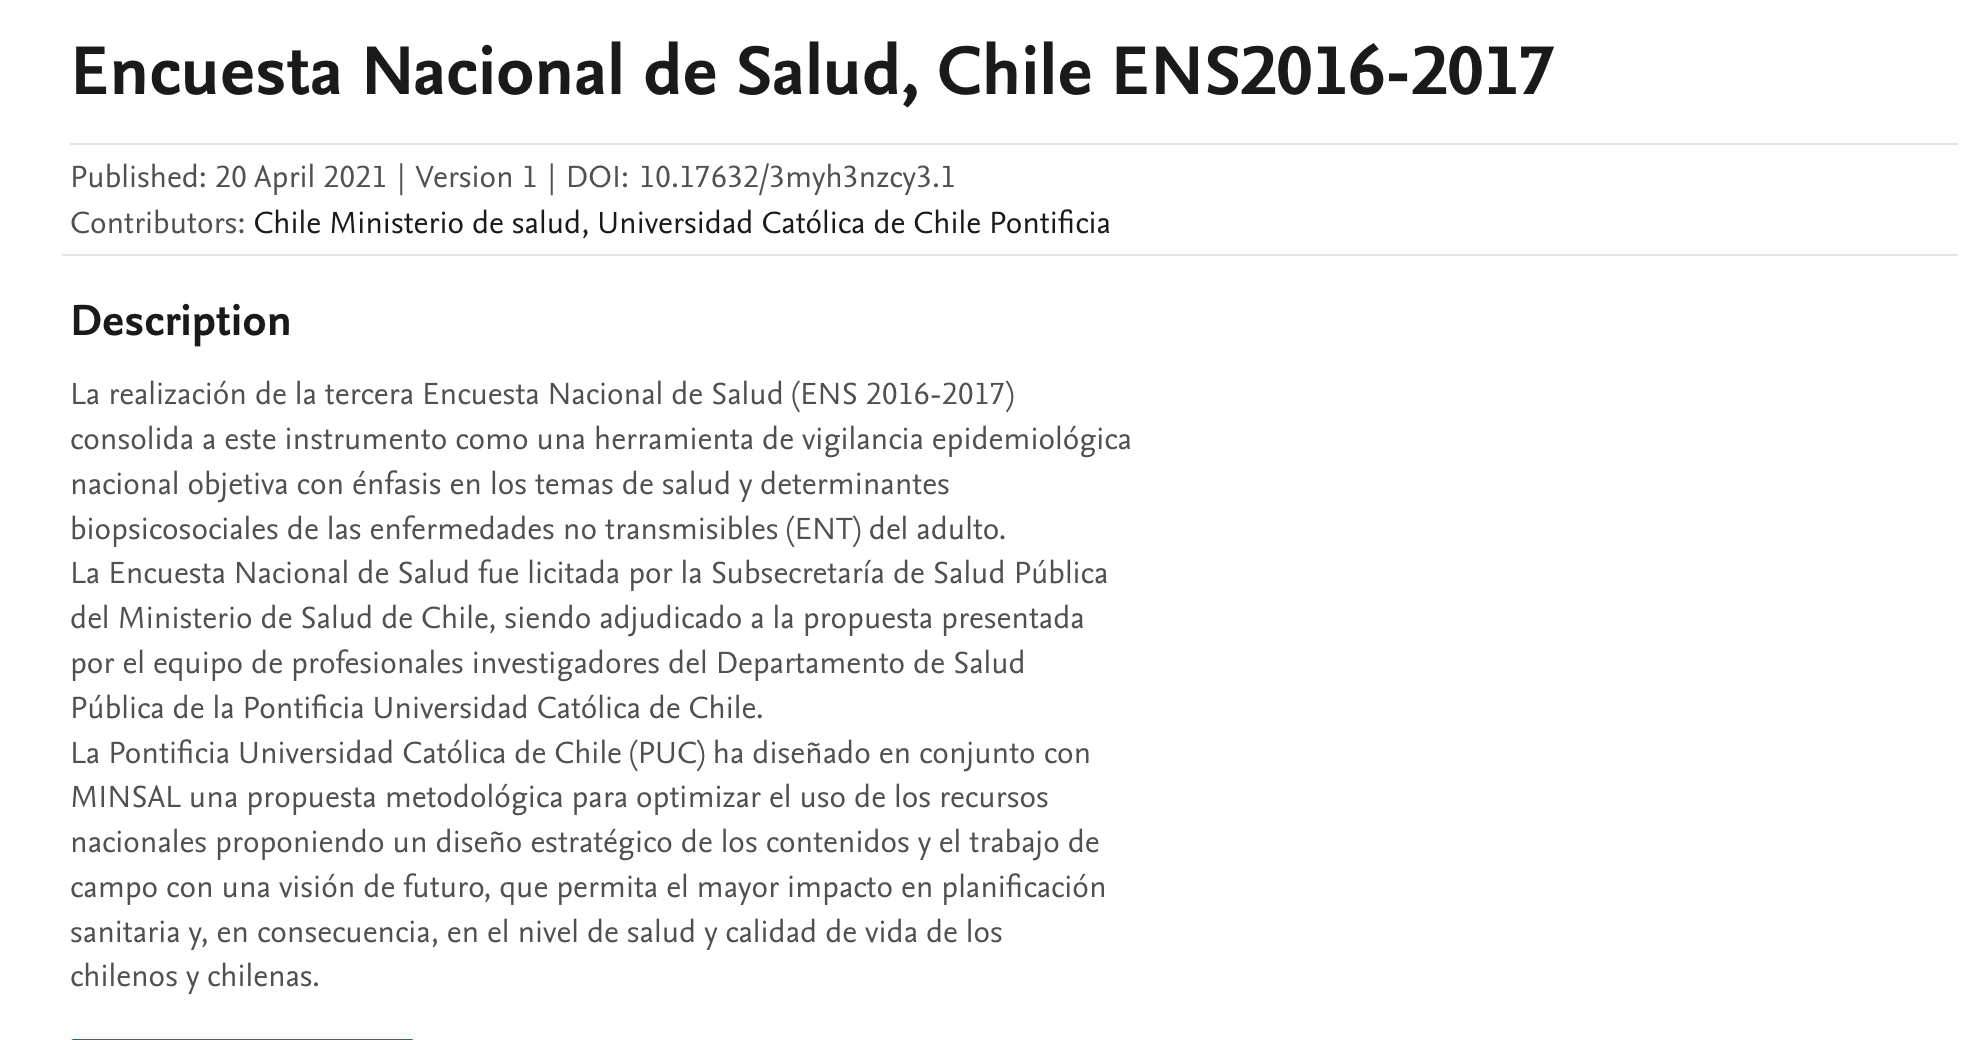</div>


### 3.1 Librerías necesarias
Las siguientes librerias son necesarias para el análisis de datos y visualización. 

In [ ]:
%%capture
# Instalar librerias para leer archivos SPSS
!pip install pyreadstat

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### 3.2 Cargar Datos

Tal como se realizo en el taller anterior, se descargara la base de datos utilizando `wget` y luego se cargara la base de datos en la variable `ens` utilizando la función de pandas `read_spss`.  

In [ ]:
# Descargar ENS
!wget https://github.com/iHealthInstitute/Talleres_Diplomado_iHealth/raw/refs/heads/main/data/ENS2016-2017.sav

In [ ]:
ens = pd.read_spss('ENS2016-2017.sav')
print(ens.head())
print(ens.shape)

## 4 Test de normalidad

En estadística inferencial, muchas de las pruebas más utilizadas —como la t de Student, el ANOVA y los intervalos de confianza— se basan en un supuesto fundamental: que las variables que analizamos siguen una distribución normal (también llamada distribución gaussiana o de campana). Este supuesto afecta directamente la validez de los resultados.

Verificar la normalidad nos permite:
* Determinar si podemos aplicar pruebas paramétricas, que suelen ser más potentes y precisas.
* Evitar errores al interpretar p-valores o al calcular promedios y desviaciones estándar.
* Decidir si necesitamos transformar los datos o usar pruebas no paramétricas alternativas (como Mann-Whitney o Kruskal-Wallis).

La forma tipica de una variable que distribute normal se puede observar en la siguiente figura:

<div style="text-align:center;">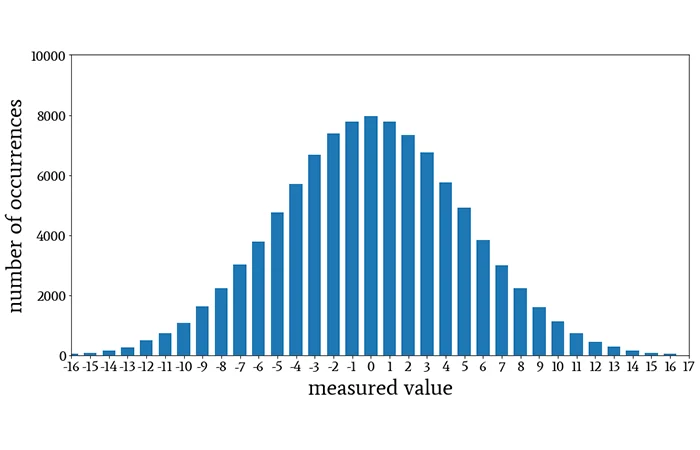</div>

Es de mucha utilidad visualizar los datos mediante su histograma para entender el comportamiento de estos.


#### **Ejercicio 1** 

Utiliza histogramas para comprobar la normalidad de las variables: `edad`, `Colesterol_HDL`, `Glucosa`, `IMC` y `Microalbuminuria_Creatinina`. Crea un gráfico para cada variable, modificando la cantidad de *bins* según sea necesario. Responde:

* ¿Qué variables parecen seguir una distribución normal?
* ¿Qué sucede en variables como la creatinina?
* Con base solo en los histogramas, ¿podemos asegurar la normalidad de los datos?

In [ ]:
# <CODE>


Para evaluar si una variable sigue una distribución normal, es necesario realizar un test de hipótesis que permita verificar su comportamiento. Gran parte (si no todos) de los métodos para aplicar estos tests se encuentran implementados en Python.

#### **Ejercicio 2** 

Utilizando el test de `Shapiro-Wilk`, verifica si las variables antes mencionadas siguen una distribución normal. Deberás buscar en internet qué función puedes utilizar para realizar este test. Recuerda mencionar si se acepta o se rechaza la hipótesis nula (p-valor > 0.05). Responde:

* De acuerdo con este resultado, ¿qué variables siguen una distribución normal?



In [ ]:
# <CODE>


#### **Ejercicio 3** 

Realiza un gráfico Q-Q para cada una de las variables y analiza qué sucede en los extremos de este. Responde:

* ¿Qué nos indican los resultados del gráfico?
* ¿Qué variables parecen seguir una distribución normal?

In [ ]:
# <CODE>


### 4.1 Teorema del Límite Central (TLC)

El Teorema del Límite Central (TLC) es uno de los conceptos más fundamentales y poderosos de la estadística. Nos dice que:

> Si tomamos muchas muestras aleatorias de una población (de cualquier forma), y calculamos la media de cada muestra, esas medias estarán aproximadamente distribuidas normalmente, independientemente de la forma de la distribución original, siempre que el tamaño de la muestra sea suficientemente grande.

En otras palabras, incluso si los datos originales son sesgados, asimétricos o contienen valores atípicos, la distribución de las medias muestrales se vuelve cada vez más parecida a una campana (distribución normal) a medida que aumenta el tamaño de las muestras. Este fenómeno es clave porque permite aplicar técnicas estadísticas basadas en la normalidad, como intervalos de confianza o pruebas *t*, aun cuando la variable original no sea normal.

#### **Ejercicio 4** 

Utilizando las mismas variables antes trabajadas (`Edad`, `Colesterol_HDL`, `Glucosa`, `IMC`, `Microalbuminuria_Creatinina`), verifica si es posible obtener distribuciones normales mediante el Teorema del Límite Central.

Para esto, debes:

1. Realizar muestreo aleatorio de la variable original, extrayendo muestras de tamaño 5, 10 y 30. *Hint*: utiliza la función `sample` de pandas.
2. Repetir este proceso 500 veces.
3. Formar un nuevo vector con las medias de cada muestra simulada.
4. Evaluar si ese vector sigue una distribución normal:
   * Aplicar la prueba de Shapiro-Wilk.
   * Graficar un Q-Q plot.

Responde:

* ¿Qué ocurre con la normalidad de las medias al aumentar el tamaño de la muestra? ¿Cómo afecta al valor *p*?
* ¿Alguna variable requiere un *n* mayor para aproximarse a la normalidad?
* ¿En qué casos visualmente el Q-Q plot parece normal, pero el *p*-valor de Shapiro indica lo contrario?

In [ ]:
# <CODE> 1. Sampling aleatorio y 2. repetir proceso 1000 veces


In [ ]:
# <CODE> 3. Formar nuevo vector


A partir de los gráficos anteriores, se observa que la variable microalbuminuria presenta un fuerte sesgo hacia la izquierda, incluso después de aplicar el Teorema del Límite Central. Esto también se evidencia en el histograma original, donde los valores se concentran cerca de cero. Para poder trabajar adecuadamente con esta variable, es necesario aplicar una transformación que la aproxime a una distribución normal. Una de las más comunes en estos casos es la transformación logarítmica.






#### **Ejercicio 5** 

Al igual que en el ejercicio anterior, pero ahora aplica una transformación logarítmica a la variable `Microalbuminuria_Creatinina` y repite el proceso de muestreo aleatorio y análisis de normalidad solo para esta variable. Responde:
* ¿Cómo afecta la transformación logarítmica a la normalidad de la variable?
* ¿Qué cambios observas en el histograma y el Q-Q plot después de la transformación?
* ¿La transformación logra que la variable se asemeje más a una distribución normal?


In [ ]:
# <CODE>


### 4.2 Comparación entre grupos (variables continuas)

En esta sección aplicaremos pruebas estadísticas para comparar grupos en relación con variables continuas, como el peso, IMC, glicemia o colesterol. Estas comparaciones nos permiten evaluar si existen diferencias significativas entre grupos, por ejemplo:

* ¿Tienen las mujeres un IMC promedio diferente al de los hombres?
* ¿Varía la glicemia entre personas con y sin educación superior?
* ¿Existen diferencias regionales en los niveles de colesterol?

Para responder estas preguntas, utilizamos herramientas estadísticas basadas en el planteamiento de una hipótesis nula (H₀).

> **Hipótesis nula (H₀):**  
> Supone que no hay diferencia entre los grupos.  
> Por ejemplo: “El IMC promedio en hombres y mujeres es igual”.

Al aplicar una prueba estadística, como la prueba *t* de Student o ANOVA, calculamos un *p*-valor que nos indica cuán probable sería observar los datos que tenemos si la hipótesis nula fuera cierta.

* Si el *p*-valor es menor a 0.05, se considera que existe evidencia suficiente para rechazar la hipótesis nula y concluir que hay una diferencia significativa.
* Si el *p*-valor es mayor a 0.05, no se rechaza la hipótesis nula; es decir, no se observan diferencias estadísticamente significativas.

En esta sección aplicaremos estas pruebas paso a paso según el tipo de variable y número de grupos, y discutiremos cómo interpretar los resultados correctamente en el contexto de datos reales.

#### **Ejercicio 6** 

Aplica pruebas estadísticas para comprobar si existen diferencias significativas en el `IMC` y `Glucosa` entre hombres y mujeres.

**Pasos:**

1. Verifica que las variables `IMC` y `Glucosa` estén registradas como numéricas. *Hint*: puedes usar la función `describe` de pandas.
2. Plantea la hipótesis estadística ($H_0$ y $H_1$). Puedes expresarla en texto.
3. Realiza un test de normalidad para cada grupo (hombres y mujeres) de las variables `IMC` y `Glucosa`. Utiliza el test de Shapiro-Wilk.
4. ¿Es posible realizar un *t*-test?
5. Si es posible, realiza un *t*-test para cada variable y responde:
   * ¿Qué conclusiones puedes sacar de los resultados?
6. Grafica los resultados de las pruebas realizadas. Utiliza *boxplots* y/o *violin plots* para visualizar la distribución de `IMC` y `Glucosa` por género.

In [ ]:
# <CODE> 1. verificar variables


In [ ]:
# <CODE> 2. Plantear hipotesis


In [ ]:
# <CODE> 3. Verificar normalidad


In [ ]:
# <CODE> 5. Aplicar prueba t de Student


In [ ]:
# <CODE> 5. Graficar resultados


### 4.3 Comparación entre grupos (variables categóricas)

En esta sección aplicaremos pruebas estadísticas para comparar grupos según variables categóricas, es decir, aquellas que representan clasificaciones o categorías como:

* Sexo (Hombre / Mujer)  
* Nivel educacional (Básico / Medio / Superior)  
* Presencia de comorbilidades (Sí / No)  
* Región geográfica (Norte / Centro / Sur)

Para este tipo de variables no podemos calcular promedios ni aplicar pruebas como el *t*-test. En su lugar, usamos herramientas como:

* Tablas de contingencia para visualizar la distribución conjunta de dos variables.
* La prueba de Chi-cuadrado para determinar si existe una asociación significativa entre ellas.

> **Hipótesis nula (H₀):** Las variables categóricas no están asociadas, es decir, son independientes.  
> Un *p*-valor bajo (p < 0.05) nos permite rechazar H₀ y concluir que existe una asociación estadísticamente significativa entre las variables.

Este tipo de análisis es fundamental para explorar relaciones entre factores demográficos, sociales y de salud, y detectar desigualdades o patrones relevantes en los datos.

#### **Ejercicio 7** 

Evalúa si existe una asociación entre el sexo (`Sexo`) y el haber fumado más de 100 cigarrillos en la vida (`ta2`). Para esto, debes:

1. Plantear la hipótesis estadística ($H_0$ y $H_1$). Puedes expresarla en texto.
2. Explorar los datos para entender la distribución de las variables involucradas. Utiliza la función `describe` de pandas. Elimina los valores donde `ta2` sea `NaN` o las respuestas sean "No está seguro" o "No recuerda".
3. Construir una tabla de contingencia para visualizar la relación entre `Sexo` y `ta2`.
4. Realizar la prueba de Chi-cuadrado para evaluar la asociación entre las variables.
5. Interpretar los resultados:
   * ¿Qué conclusiones puedes sacar del *p*-valor obtenido?
   * ¿Qué implicaciones tiene esta asociación en el contexto del estudio?

In [ ]:
# <CODE> 1. Plantear hipótesis


In [ ]:
# <CODE> 2. Explorar variables


In [ ]:
# <CODE> 3. Tabla de contingencia


In [ ]:
# <CODE> 4. Chi-cuadrado de independencia


#### **Ejercicio 8** 

Se analizo anteriormente como la variable `Microalbuminuria_Creatinina` presentaba un sesgo hacia la izquierda, lo que dificultaba su normalidad. Ahora, se desea evaluar si existe una asociación entre el nivel de microalbuminuria y el género (`Sexo`). El test de Mann-Whitney U es adecuado para comparar dos grupos independientes cuando la variable de interés no sigue una distribución normal. 
Para este ejercicio, debes:
1. Plantear la hipótesis estadística ($H_0$ y $H_1$). Puedes expresarla en texto.
2. Filtrar los datos para eliminar valores `NaN` en la variable `Microalbuminuria_Creatinina`.
3. Realiza el test de Mann-Whitney U para comparar los niveles de microalbuminuria entre hombres y mujeres.
4. Interpretar los resultados:
    * ¿Qué conclusiones puedes sacar del *p*-valor obtenido?
5. Visualizar los resultados utilizando un *boxplot* o *violin plot* para comparar la distribución de microalbuminuria entre hombres y mujeres.


In [ ]:
# <CODE> 1. Plantear hipótesis


In [ ]:
# <CODE> 2. Filtrar datos


In [ ]:
# <CODE> 3. Realizar el test de Mann-Whitney U


In [ ]:
# <CODE> 5. Visualizar resultados matplotlib


## 5. ANOVA: Comparación de más de dos grupos
ANOVA (Análisis de Varianza) es una técnica estadística utilizada para comparar las medias de una variable continua entre tres o más grupos independientes.

A diferencia del t-test, que solo compara dos grupos, ANOVA nos permite saber si al menos uno de los grupos tiene una media significativamente distinta sin necesidad de hacer múltiples t-tests (lo que aumentaría el riesgo de error tipo I).

>Hipótesis nula (H₀): Todas las medias poblacionales son iguales.
>Hipótesis alternativa (H₁): Al menos una media es diferente.

### ¿Qué asume ANOVA?

Antes de aplicar ANOVA, se deben cumplir ciertas condiciones:
* Las observaciones son independientes.
* Las distribuciones son aproximadamente normales (aunque ANOVA es robusto si los tamaños muestrales son grandes).
* Las varianzas son similares entre los grupos (homocedasticidad).

Si se encuentra una diferencia significativa, se puede continuar con pruebas post hoc (como Tukey) para identificar cuáles grupos difieren entre sí.

#### **Ejercicio 9** 

Evalua si existen diferencias significativas en el IMC entre personas de tres zonas del pais: Norte, Centro y Sur. Para esto, debes:
1. Plantear la hipótesis estadística ($H_0$ y $H_1$). Puedes dejarla expresada mediante texto.
2. Explorar los datos para entender la distribución de las variables involucradas. Utiliza la función `describe` de pandas. Crear la variable `Zona_geo` con los valores "Norte", "Centro" y "Sur" según la región de residencia.
3. Verificar el tamaño de la muestra por grupo.
4. Realizar el test de ANOVA para evaluar si hay diferencias significativas en el IMC entre las zonas geográficas. HINT: utiliza la función `f_oneway` de `scipy.stats`.
5. Grafique e interprete los resultados:
   * ¿Qué conclusiones puedes sacar del p-valor obtenido?
   * ¿Qué implicaciones tiene esta diferencia en el contexto del estudio?  
6. Si el ANOVA es significativo, realizar un test post hoc (como Tukey) para identificar qué grupos difieren entre sí. HINT: puedes utilizar la función `pairwise_tukeyhsd` de `statsmodels`.


In [ ]:
# <CODE> 1. Plantear hipótesis


In [ ]:
# <CODE> 2. Crear variable Zona_Geografica


In [ ]:
# <CODE> 3. Verificar el tamaño de la muestra de IMC por zona_geo


In [ ]:
# <CODE> 4. Aplicar ANOVA


In [ ]:
# <CODE> 5. Visualizar resultados


In [ ]:
# <CODE> 6. Prueba de Tukey


#### **Ejercicio 10** 

Estás llevando a cabo un estudio sobre los niveles de colesterol LDL y la región geográfica de residencia. Se plantea la hipótesis de que el colesterol LDL promedio varía entre las regiones Norte, Centro y Sur del país. Evalúa si esta hipótesis es correcta y, en caso afirmativo, ¿cuál de las regiones presenta el colesterol LDL promedio más alto?


In [ ]:
# <CODE> 1. Plantear hipótesis


In [ ]:
# <CODE> 2. Verificar tamaño de muestra


In [ ]:

# <CODE> 3. Aplicar ANOVA


In [ ]:
# <CODE> 4. Visualizar resultados


In [ ]:
# <CODE> 5. Prueba de Tukey
